# <span style="color:#2E86C1;">Exploratory Data Analysis and Classification Report</span>

## <span style="color:#1ABC9C;">A1. Exploratory Data Analysis (EDA)</span>

### <span style="color:#F39C12;">1. Data Types of Attributes</span>
- Briefly mention the types of attributes found in the dataset.

### <span style="color:#E74C3C;">2. Missing Values and Imputation</span>
- Describe the missing values and the method used for imputation.

### <span style="color:#9B59B6;">3. Class Balance Nature</span>
- Include a brief description of class distribution.
- Add a class distribution chart.

### <span style="color:#2ECC71;">4. Attribute Correlation Study</span>
- Mention the correlation findings.
- Include a heatmap plot of the correlation matrix.

### <span style="color:#34495E;">5. Matrix Rank Study</span>
- State the rank of the feature matrix and its implications.

### <span style="color:#D35400;">6. Data Range and Normalization Aspects</span>
- Summarize the range of attributes before normalization.
- Describe the normalizcuss potential improvements or considerations for future work.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load dataset
file_path = "/content/drive/MyDrive/Custom_CNN_Features.csv"
df = pd.read_csv(file_path)

In [7]:
# Data types of attributes
print("Data Types of Attributes:")
print(df.dtypes)

Data Types of Attributes:
Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object


In [8]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())
if df.isnull().sum().any():
    # Imputation example (mean for numerical columns)
    df.fillna(df.mean(), inplace=True)
    print("Missing values imputed with column mean.")


Missing Values:
Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64



Class Balance:
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


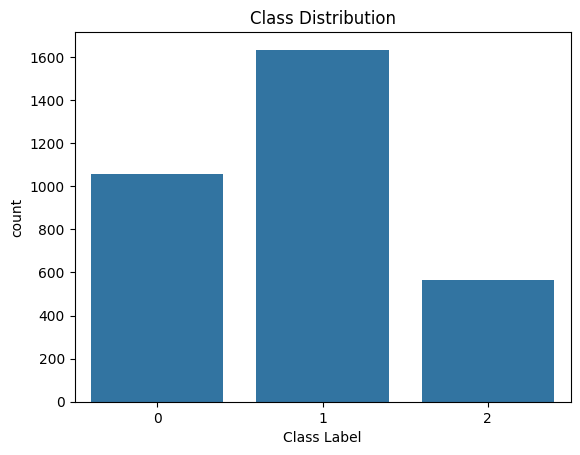

In [9]:
# Class balance nature
print("\nClass Balance:")
print(df['Class Label'].value_counts())
sns.countplot(data=df, x='Class Label')
plt.title("Class Distribution")
plt.show()

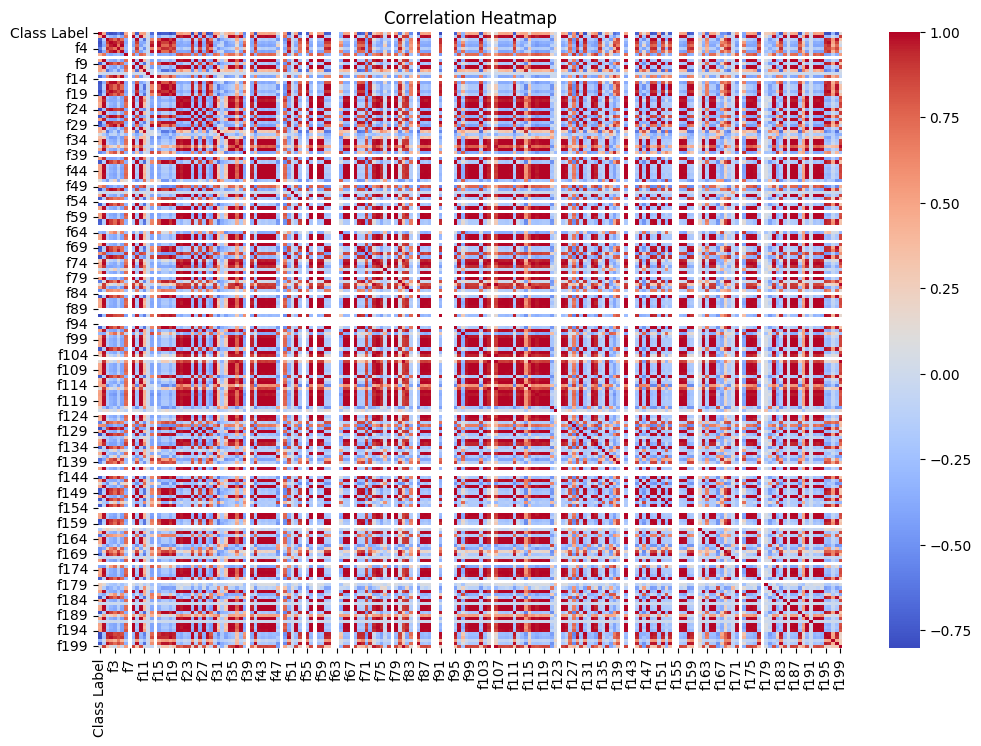

In [10]:
# Attribute correlation
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Matrix rank
numeric_df = df.select_dtypes(include=[np.number])

# Compute matrix rank
matrix_rank = np.linalg.matrix_rank(numeric_df.values)
print(f"Matrix Rank: {matrix_rank}")

Matrix Rank: 175


In [12]:
# Data range and normalization
print("\nData Range:")
print(df.describe())


Data Range:
       Class Label           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.849062    17.516938    57.919104   112.822180   170.829473   
std       0.689245    54.948034    93.672074    96.561850   124.512873   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000    46.988506    85.638191   
50%       1.000000     0.000000     0.000000    93.278381   160.636246   
75%       1.000000     0.000000   117.704697   159.855179   248.145508   
max       2.000000   781.789490   459.207794   536.879639   760.753845   

                f4           f5           f6      f7            f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0   3253.000000  ...   
mean     17.606476   141.614480    11.035532     0.0    214.312125  ...   
std      35.626627    99.128478    20.554964     0.0    738.811309  ...   
min       0.000000  

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
normalized_features = scaler.fit_transform(numeric_df.drop('Class Label', axis=1))
print("\nData Normalization Done.")


Data Normalization Done.


---

## <span style="color:#2980B9;">A2. Train-Test Split and Classification</span>

### <span style="color:#8E44AD;">1. Train-Test Split</span>
- Mention the ratio used (e.g., 75:25) and rationale.

### <span style="color:#27AE60;">2. Classifier Models</span>
- List the classifiers used (kNN, Decision Tree, SVM, Random Forest, Naïve Bayes).

### <span style="color:#E67E22;">3. Evaluation Metrics</span>
- Accuracy
- Precision
- Recall
- F1-Score
- AUROC

### <span style="color:#C0392B;">4. Summary of Results</span>
- Include a table summarizing the performance metrics for each classifier.
- Add visualizations such as bar charts for metrics comparison.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time


In [15]:
# Split dataset
X = pd.DataFrame(normalized_features)
y = df['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Classifiers
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [17]:
# Train and evaluate models
results = []
for name, model in classifiers.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time

    metrics = {
        "Classifier": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted"),
        "Train Time (s)": train_time,
        "Test Time (s)": test_time
    }

    # For AUROC (if possible)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        metrics["AUROC"] = roc_auc_score(y_test, y_prob, multi_class="ovr")
    else:
        metrics["AUROC"] = "N/A"

    results.append(metrics)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


kNN Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       288
           1       0.91      0.97      0.93       376
           2       0.99      0.93      0.96       150

    accuracy                           0.94       814
   macro avg       0.95      0.93      0.94       814
weighted avg       0.94      0.94      0.94       814


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       288
           1       0.89      0.93      0.91       376
           2       0.94      0.91      0.93       150

    accuracy                           0.92       814
   macro avg       0.92      0.91      0.92       814
weighted avg       0.92      0.92      0.92       814


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       288
           1       0.89      0.9

In [18]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


Summary of Results:
      Classifier  Accuracy  Precision    Recall  F1-Score  Train Time (s)  \
0            kNN  0.937346   0.939305  0.937346  0.937441        0.015043   
1  Decision Tree  0.915233   0.916263  0.915233  0.915296        0.272121   
2            SVM  0.929975   0.933153  0.929975  0.930140        0.918416   
3  Random Forest  0.937346   0.939361  0.937346  0.937397        2.641087   
4    Naive Bayes  0.923833   0.925126  0.923833  0.924005        0.047629   

   Test Time (s)     AUROC  
0       0.201847  0.969166  
1       0.005693  0.932460  
2       0.114087  0.979158  
3       0.119735  0.984026  
4       0.023082  0.966338  


---

## <span style="color:#16A085;">A3. Model Fit Analysis</span>
- Discuss whether the models are underfit, regular fit, or overfit.
- Include a table or textual description of train vs test set metrics.





In [19]:
for name, model in classifiers.items():
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{name} Fit Analysis:")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    if train_accuracy > test_accuracy + 0.1:
        print("-> Overfit Detected\n")
    elif test_accuracy > train_accuracy + 0.1:
        print("-> Underfit Detected\n")
    else:
        print("-> Regular Fit\n")

kNN Fit Analysis:
Train Accuracy: 0.9450594505945059
Test Accuracy: 0.9373464373464373
-> Regular Fit

Decision Tree Fit Analysis:
Train Accuracy: 1.0
Test Accuracy: 0.9152334152334153
-> Regular Fit

SVM Fit Analysis:
Train Accuracy: 0.933169331693317
Test Accuracy: 0.9299754299754299
-> Regular Fit

Random Forest Fit Analysis:
Train Accuracy: 1.0
Test Accuracy: 0.9373464373464373
-> Regular Fit

Naive Bayes Fit Analysis:
Train Accuracy: 0.9167691676916769
Test Accuracy: 0.9238329238329238
-> Regular Fit



---

## <span style="color:#3498DB;">A4. Timing Analysis</span>
- Present a table showing the training and prediction timings for each classifier.
- Mention any observations on model efficiency.

---

In [20]:
results_df[['Classifier', 'Train Time (s)', 'Test Time (s)']]

,Classifier,Train Time (s),Test Time (s)
0,kNN,0.015043,0.201847
1,Decision Tree,0.272121,0.005693
2,SVM,0.918416,0.114087
3,Random Forest,2.641087,0.119735
4,Naive Bayes,0.047629,0.023082



## <span style="color:#2C3E50;">Conclusion</span>
- Identify the best-performing model based on the results.
- Justify your choice using metrics and observations.
- Discuss potential improvements or considerations for future work.